background reading:
https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer

notebook lifted from:
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py#L4

Epoch: 0050 cost= 0.237203971 W= 0.4733581 b= -0.8082795
Epoch: 0100 cost= 0.218694940 W= 0.46004987 b= -0.7125413
Epoch: 0150 cost= 0.202323034 W= 0.44753307 b= -0.6224963
Epoch: 0200 cost= 0.187841669 W= 0.4357607 b= -0.5378067
Epoch: 0250 cost= 0.175032556 W= 0.42468852 b= -0.45815396
Epoch: 0300 cost= 0.163702741 W= 0.4142748 b= -0.38323835
Epoch: 0350 cost= 0.153681412 W= 0.40448043 b= -0.31277856
Epoch: 0400 cost= 0.144817412 W= 0.3952685 b= -0.2465087
Epoch: 0450 cost= 0.136977211 W= 0.3866045 b= -0.18418072
Epoch: 0500 cost= 0.130042598 W= 0.37845585 b= -0.12555954
Epoch: 0550 cost= 0.123908982 W= 0.37079182 b= -0.07042492
Epoch: 0600 cost= 0.118483938 W= 0.36358362 b= -0.018569361
Epoch: 0650 cost= 0.113685623 W= 0.35680407 b= 0.03020208
Epoch: 0700 cost= 0.109441608 W= 0.35042772 b= 0.07607283
Epoch: 0750 cost= 0.105687983 W= 0.34443063 b= 0.119215466
Epoch: 0800 cost= 0.102368049 W= 0.3387902 b= 0.15979223
Epoch: 0850 cost= 0.099431738 W= 0.3334853 b= 0.19795571
Epoch: 0900 

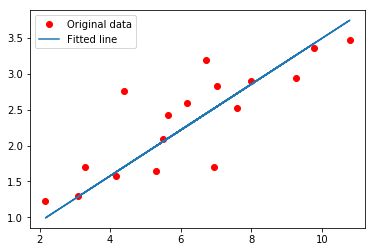

Testing... (Mean square loss Comparison)
Testing cost= 0.0825447
Absolute mean square loss difference: 0.009961873


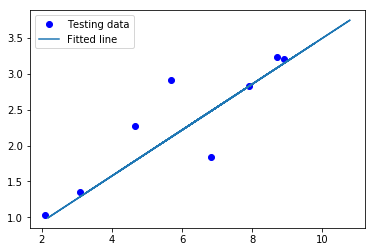

In [4]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
sess = tf.Session()

# Run the initializer
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

# Testing example, as requested (Issue #2)
test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

print("Testing... (Mean square loss Comparison)")
testing_cost = sess.run(
    tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
    feed_dict={X: test_X, Y: test_Y})  # same function as cost above
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(
    training_cost - testing_cost))

plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

> I dont reall understand this.

review TF at lynda.com

https://www.lynda.com/Google-TensorFlow-tutorials/